In [145]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
import keras
from keras.models import Sequential

In [146]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    return X, t

In [147]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t_indices = np.array(t_indices)
    t_1hot = np.zeros((t_indices.size, N))
    t_1hot[np.arange(t_indices.size), t_indices[np.arange(t_indices.size)]] = 1
    return t_1hot

In [148]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    X = np.array(X)
    t = np.array(t)
    ind = np.arange(t.shape[0])
    np.random.shuffle(ind)
    X = X[ind]
    t = t[ind]
    testsize = int(testFraction*t.shape[0])
    X_test = X[0:testsize]
    t_test = t[0:testsize]
    X_train = X[testsize:]
    t_train = t[testsize:]
    return X_train, t_train, X_test, t_test

In [149]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train = np.array(X_train).astype(float)
    X_test = np.array(X_test).astype(float)
    X_test_normalized=np.copy(X_test)
    X_train_normalized=np.copy(X_train)
    
    for i in np.arange(X_train.shape[1]):
        X_test_normalized[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])
        X_train_normalized[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

    return X_train_normalized, X_test_normalized

In [150]:
def predict_label(x):    
    '''
    Output:
    y: np array of index
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = np.zeros((np.array(x).shape[0],))
    for ind in range(x.shape[0]):
        y[ind] = np.argmax(x[ind])
    return y

In [151]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    CM = np.zeros((3,3))
    acc_pred = 0
    for i,j in zip(t,y):
        CM[int(i),int(j)] += 1
        if i==j:
            acc_pred += 1
    #print("Accuracy:",acc_pred/t.shape[0])
    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

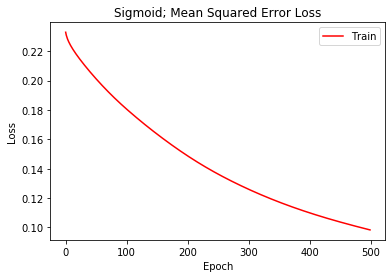

[[ 8.  0.  0.]
 [ 0.  4.  7.]
 [ 0.  0. 11.]]


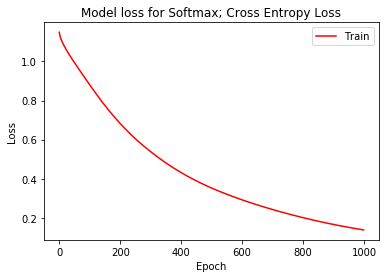

[[ 8.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0. 11.]]


In [152]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X, t = loadIrisData()
    X_train, t_train, X_test, t_test = splitData(X, t)
    X_train, X_test = normalizeX(X_train, X_test)
    t_train = one_hot_encoding(t_train, 3)
    
    model1 = Sequential()
    model1.add(keras.layers.Dense(units=10, activation='sigmoid', input_dim=4))
    model1.add(keras.layers.Dense(units=3, activation='sigmoid'))
    model1.compile(loss=keras.losses.mean_squared_error, optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9))
    history1 = model1.fit(X_train, t_train, epochs = 500, batch_size = 120, verbose=0)
    classes1 = predict_label(model1.predict(X_test, batch_size=120))
    plt.plot(history1.history['loss'],'r')
    plt.title('Sigmoid; Mean Squared Error Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.show()
    print(getCM(classes1, t_test))
    #,optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.9, nesterov=True)
    model2 = Sequential()
    model2.add(keras.layers.Dense(units=10, activation='sigmoid', input_dim=4))
    model2.add(keras.layers.Dense(units=3, activation='softmax'))
    model2.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9))
    history2 = model2.fit(X_train, t_train, epochs = 1000, batch_size = 120,  verbose=0)
    classes2 = predict_label(model2.predict(X_test, batch_size=120))
    plt.plot(history2.history['loss'], 'r')
    plt.title('Model loss for Softmax; Cross Entropy Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.show()
    print(getCM(classes2, t_test))
    
    
    
if __name__=="__main__":
    experiment()